# 3. Approche statistique avec statmodels

## 1. Sachant que les modèles ARIMA et SARIMA sont des régression linéaires qui prennent comme variables explicatives les “lags” (les états précédents) de notre time série. Pourquoi est-on si attaché au fait que notre série temporelle soit stationnaire?


On attache une grande importance à la stationnarité d'une série temporelle car :

- Elle garantit la stabilité des propriétés statistiques
- Elle simplifie l'analyse en éliminant les tendances et variations saisonnières
- Elle permet une interprétation claire des coefficients des modèles
- Elle améliore l'efficacité des prévisions à court terme
- Elle assure la validité des tests statistiques utilisés dans la modélisation ARIMA et SARIMA. 

=> La stationnarité facilite la modélisation et la prévision précise des séries temporelles.

## 2. Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?


AR signifie 'AutoRegressif', un modèle AR utilise l'historique de la variable que nous essayons de prédire pour estimer sa valeur future. 

Le paramètre "p" représente le nombre de pas en arrière dans le temps que nous regardons pour faire nos prédictions.

Exemple : Si nous avons un modèle AR(2), cela signifie que nous utilisons les deux valeurs immédiatement précédentes de la variable dépendante pour prédire sa valeur actuelle.

Plus "p" est grand, plus nous regardons loin en arrière dans le temps pour influencer nos prédictions.

Un modèle AR(p) est défini mathématiquement comme suit :
- X(t) = c + φ1X(t-1) + φ2X(t-2) + ... + φp*X(t-p) + ε(t)

où :

    X(t) est la valeur de la série temporelle à l'instant t.
    φ1, φ2, ..., φp sont les coefficients de régression associés aux p décalages précédents (ou "lags").
    ε(t) est le terme d'erreur aléatoire à l'instant t.
    c est une constante.

## 3. Qu’est ce qu’un modèle MA, à quoi correspond le paramètre q?


MA signifie 'Moving Average' (Moyenne Mobile en Français), le modèle MA se concentre sur les erreurs passées, également appelées résidus. Il permet de modéliser les variations aléatoires qui ne sont pas expliquées par les valeurs passées.

Le paramètre 'q' représente le nombre de valeurs passées de l'erreur que nous utilisons pour prédire la valeur actuelle de la série temporelle. 

Plus "q" est grand, plus nous regardons en arrière dans le temps pour prendre en compte les erreurs passées dans notre prédiction.

Un modèle MA(q) est défini mathématiquement comme suit :

- X(t) = c + ε(t) + θ1ε(t-1) + θ2ε(t-2) + ... + θqε(t-q)

où :

    X(t) est la valeur de la série temporelle à l'instant t.
    ε(t) est le terme d'erreur au temps t.
    θ1, θ2, ..., θq sont les coefficients associés aux erreurs passées (résidus) ε(t-1), ε(t-2), ..., ε(t-q).
    c est une constante.

NB : Bien que le terme "moyenne mobile" soit utilisé, il est important de noter que son application dans le contexte des modèles MA diffère de la notion de moyenne mobile classique où vous calculeriez simplement des moyennes des données brutes sur une période donnée.

L'intuition : C'est possible qu'il y ait un micro-pattern des erreurs dans mon modèle. 

## 4. Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d?

Le modèle ARIMA combine les deux modèles précédents avec en plus la composante I qui signifie 'Integrated'. Cette composante représente la différenciation intégrée nécessaire pour rendre la série temporelle stationnaire. Elle consiste à soustraire la série à elle-même avec un décalage fixe jusqu'à ce que la stationnarité soit atteinte. Cela permet de gérer les tendances et les variations systématiques.

Le paramètre "d" dans ARIMA correspond à l'ordre de différenciation intégrée. Il indique combien de fois il est nécessaire de différencier la série temporelle pour la rendre stationnaire.

Exemple : Si "d" est égal à 1, cela signifie que nous devons soustraire chaque observation de la précédente pour supprimer une tendance linéaire.

## 5. Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s?


Le modèle SARIMA est une extension du modèle ARIMA qui tient compte des saisons dans les données temporelles.

Le paramètre "s" dans le modèle SARIMA représente la période de saisonnalité, c'est-à-dire à quelle fréquence ces motifs saisonniers se répètent dans la série.

Exemple : si vous avez des données de ventes mensuelles et que vous remarquez que les ventes augmentent chaque année à la même période, la période de saisonnalité "s" serait de 12 mois, car les motifs saisonniers se répètent chaque année. 

## 6. Déterminer les paramètres s, d, q, p  à l’aide des graphiques d’autocorrélation et d’autocorrélation partielle, ainsi qu’à l’aide des graphiques de la première partie.

- s boxplot 
- i regarder la tendance ligne, parabole, double parabole
- p autocorrelation partielle 
- q on regarde le nombre de point positif sur le graphique d'autocorrélation

### Déterminer d’abord s et appliquer la désaisonnalisation

Au vu des graphiques de la première partie, la saisonnalité semble être annuelle s = 12 et hebdomadaire. La demande d'électricité est plus élevée pendant les mois d'hiver en raison du chauffage électrique. Cette saisonnalité se répète chaque année. Le dimanche il y a moins de consommation. 

In [155]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [156]:
df = pd.read_csv('consommation-haut-de-france-mois.csv')
df['date'] = pd.to_datetime(df['date'])

In [157]:
# Mettez la colonne "date" en index
df.set_index('date', inplace=True)
df

,consommation_brute_electricite_rte
date,
2013-01-31,7434.031329
2013-02-28,7485.758185
2013-03-31,7050.158602
2013-04-30,6036.732639
2013-05-31,5518.442204
...,...
2023-02-28,6102.896577
2023-03-31,5783.589382
2023-04-30,5428.306250


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2013-01-31 to 2023-06-30
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   consommation_brute_electricite_rte  126 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [159]:
# Spécifier la période de saisonnalité (s), par exemple, s = 12 pour une saisonnalité mensuelle
s = 12

# Calculer la moyenne mobile sur la période de saisonnalité s
serie_desaisonnalisee = df['consommation_brute_electricite_rte'].rolling(window=12,center=True, win_type=None).mean()

<Axes: xlabel='date'>

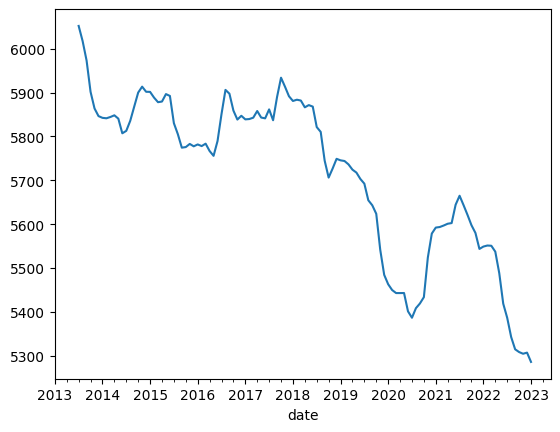

In [160]:
serie_desaisonnalisee.plot()

### Sur la série désaisonnalisée recherchez d et détrendez

In [161]:
serie_desaisonnalisee.dropna(inplace=True)

In [162]:
serie_desaisonnalisee

date
2013-07-31    6051.846503
2013-08-31    6017.299706
2013-09-30    5972.842860
2013-10-31    5901.617558
2013-11-30    5863.703033
                 ...     
2022-09-30    5314.655883
2022-10-31    5308.351335
2022-11-30    5304.521937
2022-12-31    5307.062260
2023-01-31    5285.874297
Name: consommation_brute_electricite_rte, Length: 115, dtype: float64

In [163]:
# Étape 3 : Détrendre la série
serie_detrendee = serie_desaisonnalisee-serie_desaisonnalisee.shift()

<Axes: xlabel='date'>

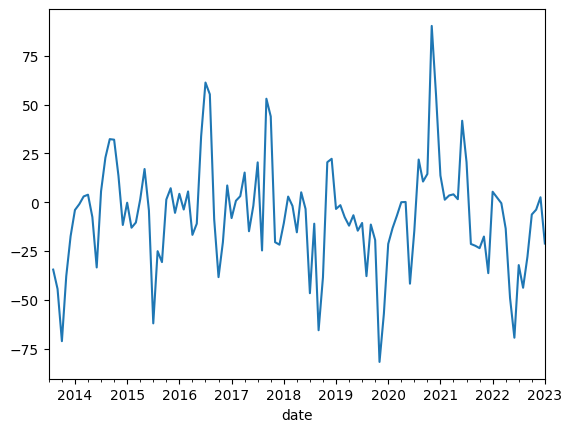

In [164]:
serie_detrendee.plot()

### Sur la série détrendée, recherchez q et p

In [165]:
serie_detrendee.dropna(inplace=True)

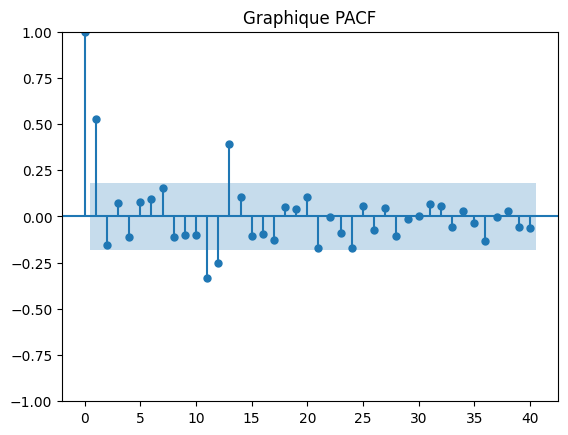

In [166]:
# Tracer le PACF
plot_pacf(serie_detrendee, lags=40)
plt.title('Graphique PACF')
plt.show()

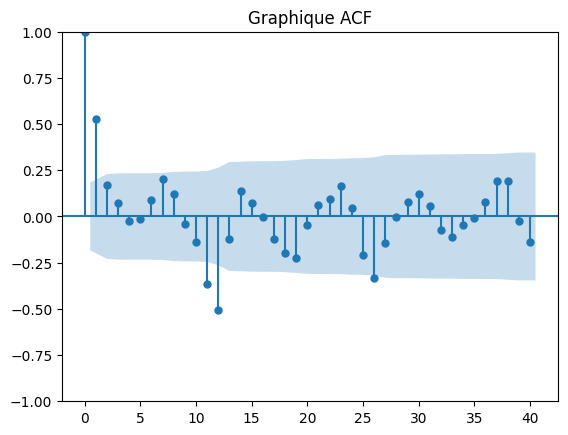

In [167]:
# Tracer l'ACF
plot_acf(serie_detrendee, lags=40)
plt.title('Graphique ACF')
plt.show()

Selon les graphiques ACF et PACF :

- q = 1 et p = 1

### 7. A l’aide statmodels et dans une approche statistique (sans train/test/split), lancez un modèle ARIMA sur la série désaisonnalisée. 

In [168]:
p, d, q = 1, 1, 1
model = sm.tsa.ARIMA(serie_desaisonnalisee, order=(p, d, q))
results = model.fit()

/home/agathe/miniconda3/envs/pandas/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/agathe/miniconda3/envs/pandas/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/agathe/miniconda3/envs/pandas/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [169]:
results.summary()

                                       SARIMAX Results                                        
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                  115
Model:                                 ARIMA(1, 1, 1)   Log Likelihood                -520.564
Date:                                Tue, 19 Sep 2023   AIC                           1047.129
Time:                                        10:55:58   BIC                           1055.337
Sample:                                    07-31-2013   HQIC                          1050.460
                                         - 01-31-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2859      0.159      1.800      0.072      -0.025       0.597
ma.

### Qu'est-ce que l'AIC (Akaike Information Criterion) ?

L'AIC est un critère d'information utilisé pour évaluer la qualité d'un modèle statistique. Il prend en compte la qualité du modèle et la complexité du modèle. Plus précisément, l'AIC mesure la perte d'information lors de l'utilisation du modèle pour représenter les données. Un AIC plus bas indique un meilleur ajustement du modèle aux données.

Dans notre exemple, l'AIC est de 1047.129. C'est une mesure qui vous permet de comparer différents modèles ARIMA avec des ordres différents. L'objectif est de trouver le modèle ARIMA avec le plus bas AIC, car cela indique qu'il offre le meilleur compromis entre ajustement aux données et complexité du modèle.

En faisant varier p, d et q : 1,1,1 reste la meilleure configuration pour le score AIC.